SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 10 - Image segmentation - Regions

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries

In [1]:
import numpy as np

from scipy import ndimage as ndi
from skimage import color, util, feature, morphology, data, filters

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### %matplotlib notebook

## Region Growing

### Creating a simple image

- 5 x 5
- 3 bits. 8 levels of intensity, [0, 7].

In [2]:
img = np.array([[7, 0, 5, 6, 5],
                [5, 1, 5, 7, 7],
                [0, 3, 6, 5, 6],
                [2, 1, 7, 7, 6],
                [0, 1, 5, 6, 1]])

### Creating the seed image

- It must be an image of labels.
- Each seed must have a single pixel. If you have more than one pixel, apply successive erosions until there is only one pixel left for each seed.

In [3]:
img_seed = np.array([[0, 0, 0, 0, 0],
                     [0, 0, 0, 2, 0],
                     [0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0]])

### Plotting the images

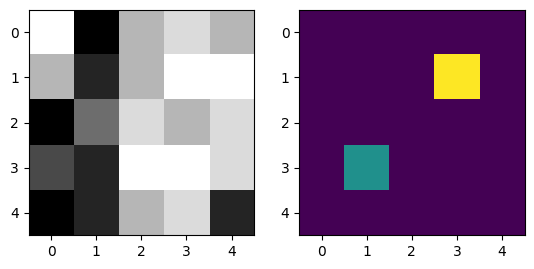

In [4]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
## plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_seed)
plt.show()

### Example with a REAL image

* ***UNCOMMENT to use***

In [5]:
# # "REAL" image
# # -------------
# img = data.coffee()
# img = color.rgb2gray(img)

# img = util.img_as_ubyte(filters.gaussian(img, sigma=4))

# # Information about the images
# print(img.shape, img.dtype, img.min(), img.max())

# # Builds the seed image
# # ---------------------
# img_seed = np.zeros(img.shape, dtype=img.dtype)
# img_seed[266, 276] = 1 # xicara
# img_seed[155, 350] = 2 #  café
# img_seed[77, 526] = 3 # mesa

# # Plot the images
# # ---------------
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(img, cmap='gray')
# ## plt.colorbar()
# plt.subplot(1,2,2)
# plt.imshow(morphology.dilation(img_seed, morphology.disk(5)))
# plt.show()

## Simple implementation of the region-growing algorithm


Number of seeds
2

List with pixel values under the seeds:
[1, 7]

Images containing the absolute differences between image f and the pixels under the seeds (Q criterion)

Region Growing stage:

>> Seed 0

>> Seed 1


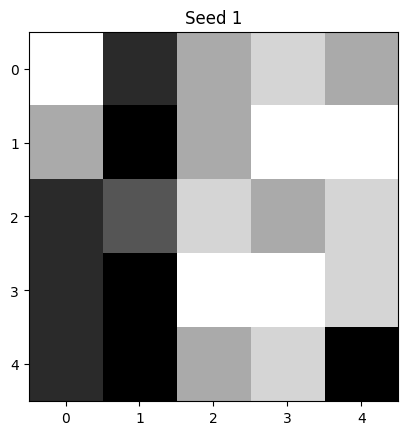

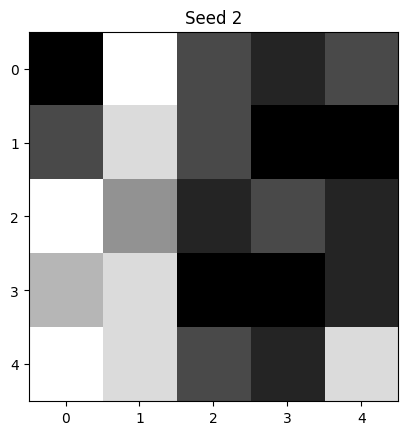

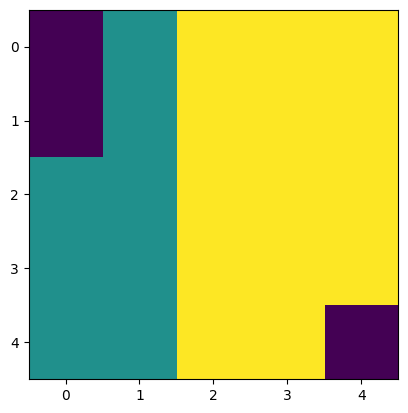

In [6]:
# ***** SELECT THE VALUE OF T *****
# *** Note: Change when using actual images ***
# Criterion Q: the pixels whose absolute differences in relation to the pixels under the seeds must be smaller than T.
T = 3 # Sugestões: 3, 5 e 8. Imagem real: 100, 110, 120

does_print = False

# Getting the number of seeds
num_seeds = img_seed.max()
# TEST
print('\nNumber of seeds')
print(num_seeds)

# List containing the pixel values under the seeds.
seed_values = []

for i in range(num_seeds):
    seed_value = img[img_seed==(i+1)]
    ## print(seed_value)
    seed_values.append(seed_value[0])
# TEST
print('\nList with pixel values under the seeds:')
print(seed_values)

# List of absolute differences between f and the pixel values on the seeds
img_dif_list = []
for seed in seed_values:
    img_dif_temp = np.abs(img - seed)
    
    img_dif_list.append(img_dif_temp)  
    
print('\nImages containing the absolute differences between image f and the pixels under the seeds (Q criterion)')
for i, (seed, img_dif) in enumerate(zip(seed_values, img_dif_list)):
    if does_print:
        print('Seed: %d. Pixel value: %d' % (i, seed))
        print(img_dif)
        

    plt.figure()
    plt.imshow(img_dif, cmap='gray')
    plt.title('Seed %d' % (i+1))

# print('\nPixels that comply with the Q criterion')
# for i, (seed, img_q) in enumerate(zip(seed_values, img_q_list)):
#     print('Seed: %d. Pixel value: %d' % (i, seed))
#     print(img_q)
    
# Initializes the output image with zeros.
img_out = np.zeros(img.shape)
    
print('\nRegion Growing stage:')
# Keep only those pixels in img_q that are 8-connected to the seed
# (Successive conditional dilations)
for i, (seed, img_dif) in enumerate(zip(seed_values, img_dif_list)):
    print('\n>> Seed ' + str(i))
    
    # Pixels that comply with the Q criterion
    img_q = img_dif < T
    
    # Removes pixels that have already been assigned to other seeds.
    # Solves ambiguities. The first takes all!
    img_q[img_out.astype(bool)] = 0

    # Initial image containing only one seed for the growing regions
    img_dil = img_seed == (i + 1)
    
    # Number of pixels in the image. Stop criteria.
    num_px = img_dil.sum()
    
    dil_count = 0
    
    while True:
        # Dilation with 3x3 structuring element (8-connected)
        img_dil = morphology.dilation(img_dil, np.ones([3,3]))
        
        # Only pixels in img_q
        img_dil = np.logical_and(img_dil, img_q)
        
        dil_count = dil_count + 1
        
        if does_print:
            print('\nDilation ' + str(dil_count))
            print(img_dil)
        
        if num_px == img_dil.sum():
            # The number of pixels has not increased
            break
        else:
            num_px = img_dil.sum()
    
    img_out[img_dil==True] = (i + 1)
    
    if does_print:
        print('\nimg_out')
        print(img_out)
    
if does_print:
    print('\nOutput image')
    print('---------------')
    print(img_out)

plt.figure()
plt.imshow(img_out)
plt.show()

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentação. Module 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
    * scikit-image. Documentação. Module 'feature'.
    * https://scikit-image.org/docs/dev/api/skimage.feature.html
* scikit-image.Documentação. Module 'segmentation'.
    * https://scikit-image.org/docs/dev/api/skimage.segmentation.html
* scikit-image. Comparing edge-based and region-based segmentation.
    * https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html
* scikit-image. Label image regions.
    * https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* NumPy. Convolution
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html